In [124]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [125]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'data/magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [126]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.54982287, -0.42036113, -0.20634745,  0.24491732,  0.21847186,
         0.19644696,  0.23301059, -0.36792941, -0.75936316, -0.7407488 ],
       [-0.58858952, -0.63524675, -1.31133099,  1.08514156,  1.15143689,
         0.41655014, -0.38133355,  0.34341534,  0.46849497, -0.028309  ]])

In [127]:
test_Features[:2]

array([[-0.66395821, -0.39830676, -0.61981697,  0.23288286,  0.59582047,
         0.33505634, -0.00156758, -0.44676019, -0.8659144 , -0.27695806],
       [-0.2761478 , -0.41992506, -0.40377174,  0.04798976, -0.07200512,
         0.23355224,  0.34273479,  0.46772098, -0.50729188,  0.27455135]])

In [128]:
train_Label[:4]

array([1, 0, 1, 1])

In [129]:
train_Features.shape

(12743, 10)

In [130]:
test_Label[:4]

array([1, 0, 0, 0])

In [131]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [132]:
model = Sequential()

In [133]:
model.add(Dense(units=40, input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [134]:
model.add(Dense(units=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [135]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [136]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 40)                440       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 164       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [138]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2)

Train on 11468 samples, validate on 1275 samples
Epoch 1/30
 - 1s - loss: 0.6903 - acc: 0.6448 - val_loss: 0.6865 - val_acc: 0.6549
Epoch 2/30
 - 0s - loss: 0.6787 - acc: 0.7067 - val_loss: 0.6671 - val_acc: 0.7318
Epoch 3/30
 - 0s - loss: 0.6462 - acc: 0.7626 - val_loss: 0.6180 - val_acc: 0.7678
Epoch 4/30
 - 0s - loss: 0.5852 - acc: 0.7830 - val_loss: 0.5490 - val_acc: 0.7804
Epoch 5/30
 - 0s - loss: 0.5162 - acc: 0.7896 - val_loss: 0.4883 - val_acc: 0.7851
Epoch 6/30
 - 0s - loss: 0.4632 - acc: 0.7990 - val_loss: 0.4516 - val_acc: 0.7890
Epoch 7/30
 - 0s - loss: 0.4339 - acc: 0.8023 - val_loss: 0.4351 - val_acc: 0.7929
Epoch 8/30
 - 0s - loss: 0.4206 - acc: 0.8073 - val_loss: 0.4274 - val_acc: 0.7976
Epoch 9/30
 - 0s - loss: 0.4134 - acc: 0.8106 - val_loss: 0.4244 - val_acc: 0.7929
Epoch 10/30
 - 0s - loss: 0.4089 - acc: 0.8123 - val_loss: 0.4195 - val_acc: 0.8039
Epoch 11/30
 - 0s - loss: 0.4051 - acc: 0.8146 - val_loss: 0.4164 - val_acc: 0.8024
Epoch 12/30
 - 0s - loss: 0.4013 - a

In [139]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

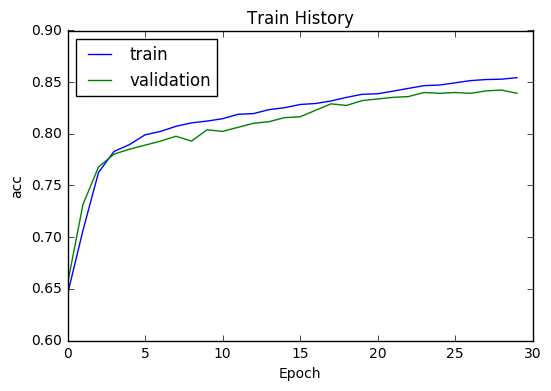

In [140]:
show_train_history(train_history,'acc','val_acc')

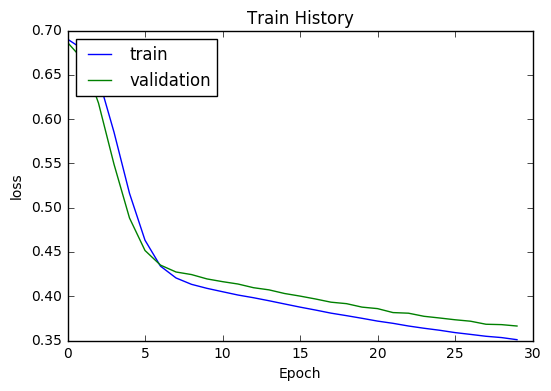

In [141]:
show_train_history(train_history,'loss','val_loss')

In [142]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 0s 58us/step


In [143]:
scores[1]

0.8497689979336948